# Précision des opérateurs de différence finie

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-notebook')

L'objectif de cet exercice est de bien comprendre l'effet du choix d'un opérateur de différence finie sur la précision des calculs.

On va d'abord évaluer la précision avec une fonction sinus, échantillonnée avec un pas de π/10, en comparant les valeurs obtenues avec un opérateur centré et un opérateur avant.  L'erreur est calculée sachant que la dérivée d'une fonction sinus est le cosinus.

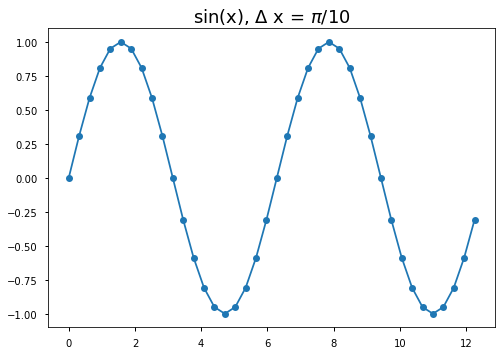

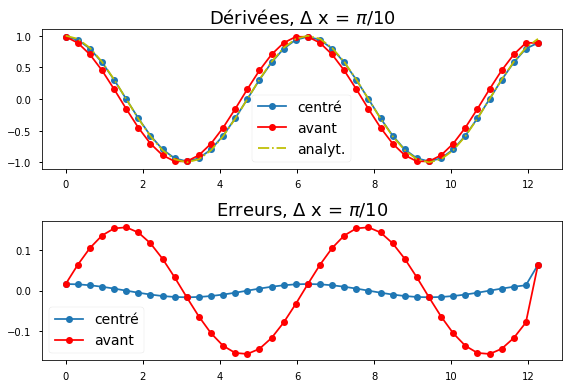

In [2]:
dx = np.pi/10
x = np.arange(0, 4*np.pi, dx)
s = np.sin(x)

plt.plot(x, s, 'o-')
plt.title('sin(x), $\Delta$ x = $\pi$/10', fontsize=18)

# solution analytique
a = np.cos(x)

# opérateur centré

ds_c = np.zeros(s.shape)
ds_c[0] = (s[1]-s[0])/dx   # op avant pour le premier point
ds_c[-1] = (s[-1]-s[-2])/dx  # op arrière pour le dernier point
ds_c[1:-1] = (s[2:] - s[:-2])/(2*dx)

# opérateur avant

ds_f = np.zeros(s.shape)
ds_f[:-1] = (s[1:]-s[:-1])/dx
ds_f[-1] = (s[-1]-s[-2])/dx  # op arrière pour le dernier point

#  Erreur

e_c = a - ds_c
e_f = a - ds_f

# %%

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x, ds_c, 'o-')
ax1.plot(x, ds_f, 'or-')
ax1.plot(x, a, 'y-.')
ax1.legend(('centré', 'avant', 'analyt.'), fontsize=14)
ax1.set_title('Dérivées, $\Delta$ x = $\pi$/10', fontsize=18)

ax2.plot(x, e_c, 'o-')
ax2.plot(x, e_f, 'or-')
ax2.legend(('centré', 'avant'), fontsize=14)
ax2.set_title('Erreurs, $\Delta$ x = $\pi$/10', fontsize=18)
plt.tight_layout()


In [3]:
print(np.max(e_f), np.max(e_c), np.max(e_f)/np.max(e_c))

0.1557919472752789 0.06370959180134173 2.445345243477104


On peut voir que l'erreur maximale est 2.4 fois plus élevée avec l'opérateur avant.

Qu'en est-il si le pas d'échantillonnage est deux fois plus petit?

0.0783784580779059 0.016317789671772553 4.80325213490706


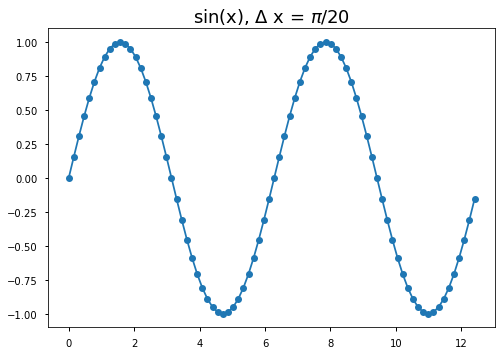

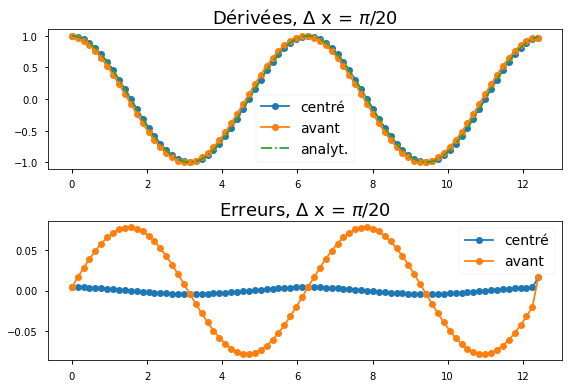

In [4]:
dx = np.pi/20
x = np.arange(0, 4*np.pi, dx)
s = np.sin(x)

plt.plot(x, s, 'o-')
plt.title('sin(x), $\Delta$ x = $\pi$/20', fontsize=18)

# solution analytique
a = np.cos(x)

# opérateur centré

ds_c = np.zeros(s.shape)
ds_c[0] = (s[1]-s[0])/dx   # op avant
ds_c[-1] = (s[-1]-s[-2])/dx  # op arrière
ds_c[1:-1] = (s[2:] - s[:-2])/(2*dx)

# opérateur avant

ds_f = np.zeros(s.shape)
ds_f[:-1] = (s[1:]-s[:-1])/dx
ds_f[-1] = (s[-1]-s[-2])/dx  # op arrière

#  Erreur

e_c = a - ds_c
e_f = a - ds_f

print(np.max(e_f), np.max(e_c), np.max(e_f)/np.max(e_c))

# %%

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x, ds_c, 'o-')
ax1.plot(x, ds_f, 'o-')
ax1.plot(x, a, '-.')
ax1.legend(('centré', 'avant', 'analyt.'), fontsize=14)
ax1.set_title('Dérivées, $\Delta$ x = $\pi$/20', fontsize=18)

ax2.plot(x, e_c, 'o-')
ax2.plot(x, e_f, 'o-')
ax2.legend(('centré', 'avant'), fontsize=14)
ax2.set_title('Erreurs, $\Delta$ x = $\pi$/20', fontsize=18)
plt.tight_layout()


On peut voir que l'erreur maximale est mainenant 4.8 fois plus élevée avec l'opérateur avant!  

Examinons la situation avec une fonction moins simple qui comporte 30 harmoniques.

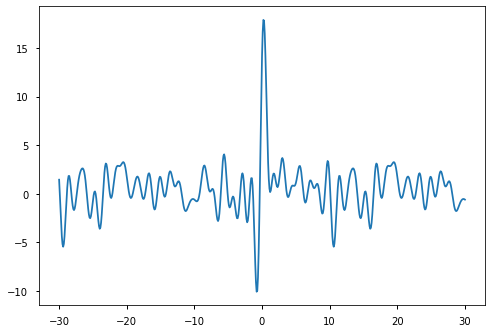

In [5]:
N = 30
T = 40
a = np.random.rand(N, 1)
b = np.random.rand(N, 1)
dx = 0.1
x = np.arange(-30, 30.1, dx)

si = np.zeros((N, len(x)))
di = np.zeros((N, len(x)))

for n in range(N):
    si[n, :] = a[n]*np.cos(2*np.pi*n/T * x) + b[n]*np.sin(2*np.pi*n/T * x)
    di[n, :] = -2*np.pi*n/T*a[n]*np.sin(2*np.pi*n/T * x) + 2*np.pi*n/T*b[n]*np.cos(2*np.pi*n/T * x)

s = np.sum(si, axis=0)
d = np.sum(di, axis=0)

plt.plot(x, s, '-')
plt.show()

6.599594659497274 1.370326133091984 4.816075896185417


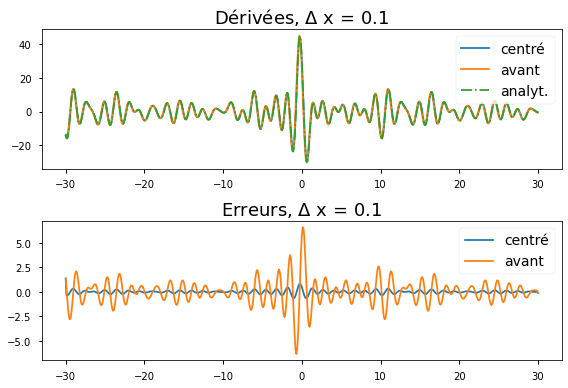

In [6]:
# opérateur centré

ds_c = np.zeros(s.shape)
ds_c[0] = (s[1]-s[0])/dx   # op avant pour le premier point
ds_c[-1] = (s[-1]-s[-2])/dx  # op arrière pour le dernier point
ds_c[1:-1] = (s[2:] - s[:-2])/(2*dx)

# opérateur avant

ds_f = np.zeros(s.shape)
ds_f[:-1] = (s[1:]-s[:-1])/dx
ds_f[-1] = (s[-1]-s[-2])/dx  # op arrière pour le dernier point

#  Erreur

e_c = d - ds_c
e_f = d - ds_f

print(np.max(e_f), np.max(e_c), np.max(e_f)/np.max(e_c))

# %%

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x, ds_c, '-')
ax1.plot(x, ds_f, '-')
ax1.plot(x, d, '-.')
ax1.legend(('centré', 'avant', 'analyt.'), fontsize=14)
ax1.set_title('Dérivées, $\Delta$ x = 0.1', fontsize=18)

ax2.plot(x, e_c, '-')
ax2.plot(x, e_f, '-')
ax2.legend(('centré', 'avant'), fontsize=14)
ax2.set_title('Erreurs, $\Delta$ x = 0.1', fontsize=18)
plt.tight_layout()


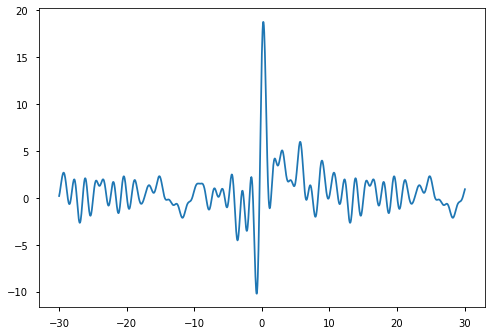

In [7]:
N = 30
T = 40
a = np.random.rand(N, 1)
b = np.random.rand(N, 1)
dx = 0.05
x = np.arange(-30, 30.1, dx)

si = np.zeros((N, len(x)))
di = np.zeros((N, len(x)))

for n in range(N):
    si[n, :] = a[n]*np.cos(2*np.pi*n/T * x) + b[n]*np.sin(2*np.pi*n/T * x)
    di[n, :] = -2*np.pi*n/T*a[n]*np.sin(2*np.pi*n/T * x) + 2*np.pi*n/T*b[n]*np.cos(2*np.pi*n/T * x)

s = np.sum(si, axis=0)
d = np.sum(di, axis=0)

plt.plot(x, s, '-')
plt.show()

3.5951248164952805 0.21634792918074908 16.617329456810808


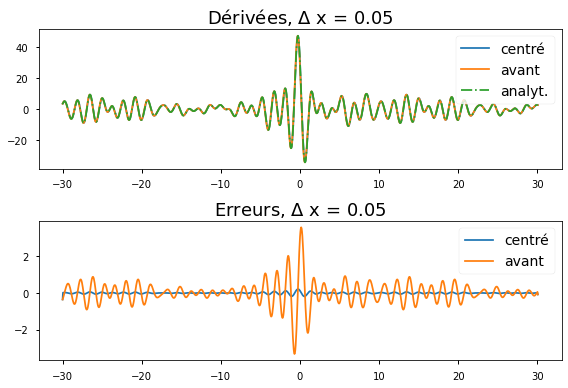

In [8]:
# opérateur centré

ds_c = np.zeros(s.shape)
ds_c[0] = (s[1]-s[0])/dx   # op avant pour le premier point
ds_c[-1] = (s[-1]-s[-2])/dx  # op arrière pour le dernier point
ds_c[1:-1] = (s[2:] - s[:-2])/(2*dx)

# opérateur avant

ds_f = np.zeros(s.shape)
ds_f[:-1] = (s[1:]-s[:-1])/dx
ds_f[-1] = (s[-1]-s[-2])/dx  # op arrière pour le dernier point

#  Erreur

e_c = d - ds_c
e_f = d - ds_f

print(np.max(e_f), np.max(e_c), np.max(e_f)/np.max(e_c))

# %%

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x, ds_c, '-')
ax1.plot(x, ds_f, '-')
ax1.plot(x, d, '-.')
ax1.legend(('centré', 'avant', 'analyt.'), fontsize=14)
ax1.set_title('Dérivées, $\Delta$ x = 0.05', fontsize=18)

ax2.plot(x, e_c, '-')
ax2.plot(x, e_f, '-')
ax2.legend(('centré', 'avant'), fontsize=14)
ax2.set_title('Erreurs, $\Delta$ x = 0.05', fontsize=18)
plt.tight_layout()



On peut observer que la précision de l'opérateur centré est encore meilleure, et qu'elle s'améliore _grosso modo_ d'un facteur 2 lorsque le pas d'échantillonnage est divisé par 2.